## 1. Introduction
Emails are a part of everyday life for millions of people, serving as a primary communication tool in both personal and professional settings. With such a vast amount of data being generated, there’s a huge opportunity to apply clustering techniques to better organize and understand email content. By using unsupervised learning, we can group emails based on patterns like content, intent, and engagement. This allows us to tackle challenges like spam detection, automatically filtering irrelevant messages, and categorizing customer support queries for faster, more efficient responses

 In this project, I am exploring a dataset of emails, which includes a label to identify spam messages. Using unsupervised learning and clustering techniques, I aim to group the emails based on patterns in content, intent, and engagement. To measure the effectiveness of the clustering, I will evaluate the model's performance by comparing it with the existing spam labels, as well as assessing the overall quality of the cluster

## 2.data selection
  Kaggle is an open-source community that hosts a comprehensive archive of diferrent categories of data. It provides valuable datasets for practitioners and researchers to explore, analyze, and develop predictive models in the field of real estate. I am sourcing my dataset from Kaggle location https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv/data

### *  Download data from Kaggle

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("balaka18/email-spam-classification-dataset-csv")

print("Path to dataset files:", path)

Path to dataset files: /Users/tkma56b/.cache/kagglehub/datasets/balaka18/email-spam-classification-dataset-csv/versions/1


In [2]:
import pandas as pd
email_df = pd.read_csv(path +'/emails.csv')
email_df.head()


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


### * Perform EDA on the  data
* check for any nuls missing values
* Clean the data
* look at the distributions

In [3]:
# check the shape of the data and number of records
# Also check the datatypes
email_df.shape
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [4]:
# All numeric and one is the object , and it is email string with id numbers , this is unique and not useful so drop it
cleaned_email_df = email_df.drop('Email No.',axis=1,inplace=False)

In [5]:
#All are numeric data type , now it is time to check for missing data null values 
res = cleaned_email_df.isna().sum().tolist()
for i in res:
    if i >0:
       print(i)

* No nulls but there are zeros if the word is not in email , so it should be fine
* The dataset contains 3,000 features, which makes it a prime candidate for dimensionality reduction. By reducing the number of features, we can streamline the data, allowing the model to run more efficiently, even with limited computational resources.

In [6]:
cleaned_email_df.head()
cleaned_email_df.tail()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,1,0,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,1,0,1
5171,22,24,5,1,6,5,148,8,2,23,...,0,0,0,0,0,0,0,0,0,0


In [7]:
cleaned_email_df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


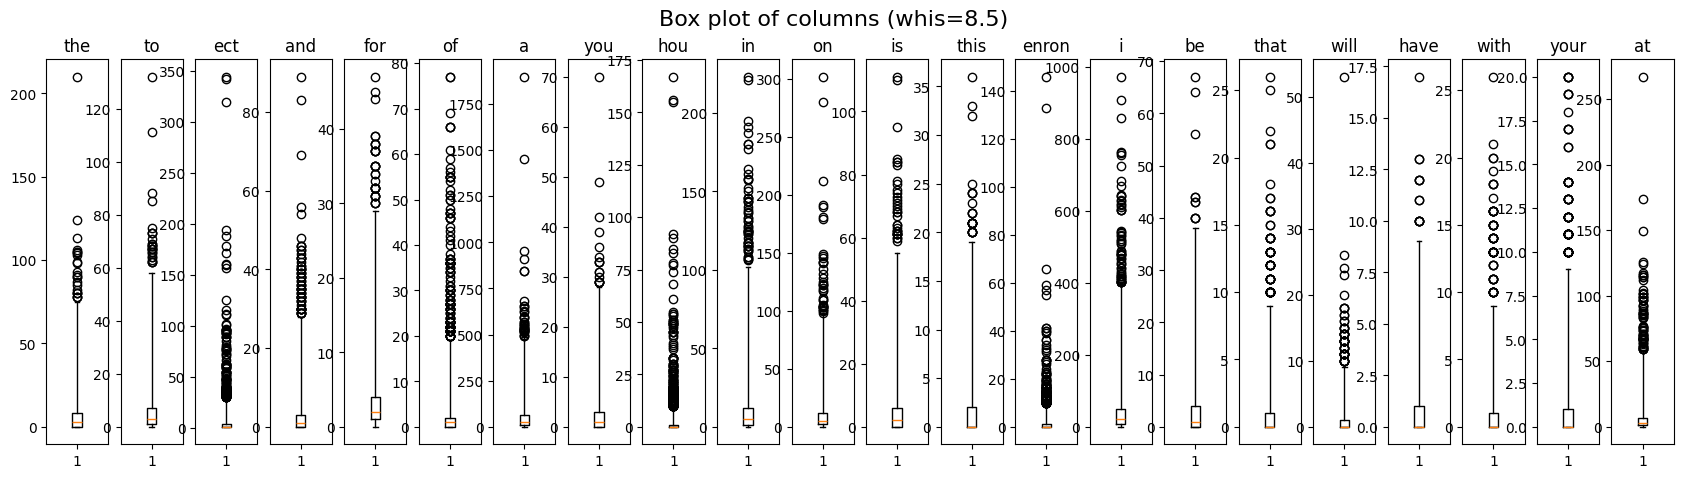

In [8]:
import matplotlib.pyplot as plt
# Create the figure and axes
fig, axs = plt.subplots(1, 22, figsize=(21, 5))
for idx, cname in enumerate(cleaned_email_df.columns):
    # Create the first box plot
    axs[idx].boxplot(cleaned_email_df[cname],whis=8.5)
    axs[idx].set_title(cname)
    if idx > 20:
        break
fig.suptitle(f"Box plot of columns (whis=8.5)", fontsize=16)
plt.show()

In [9]:
# above shows presense of outliers , I will be treating the outliers with winsorization , I will capped at the 95th percentile to minimize their influence

In [10]:
from scipy.stats.mstats import winsorize
for column in cleaned_email_df.columns:
  cleaned_email_df[column] = winsorize(cleaned_email_df[column],(0,0.05))


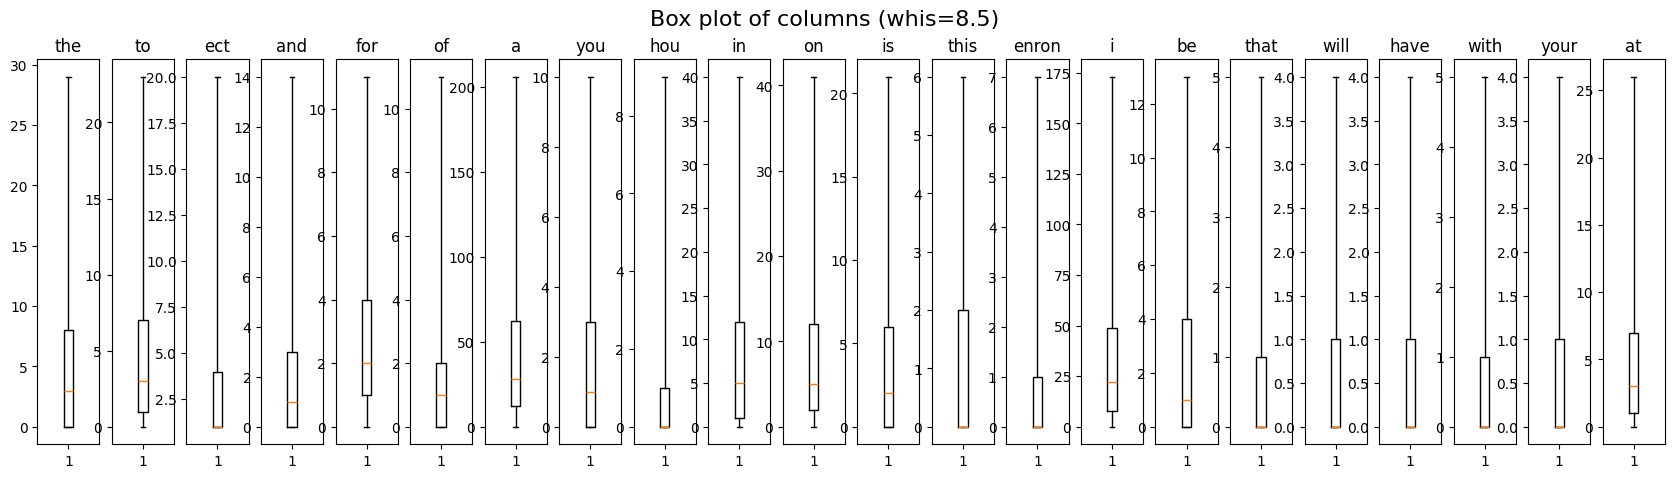

In [11]:
# box plot now for the outliers , ploting sample of 20 features
fig, axs = plt.subplots(1, 22, figsize=(21, 5))
for idx, cname in enumerate(cleaned_email_df.columns):
    # Create the first box plot
    axs[idx].boxplot(cleaned_email_df[cname],whis=8.5)
    axs[idx].set_title(cname)
    if idx > 20:
        break
fig.suptitle(f"Box plot of columns (whis=8.5)", fontsize=16)
plt.show()

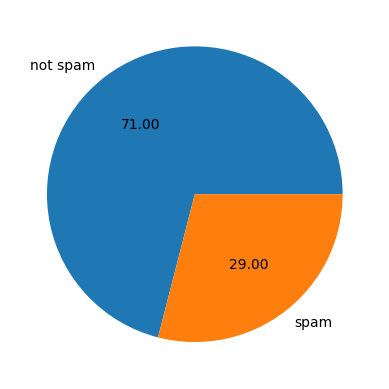

In [12]:
# percent of spam and non spam emails in the list
import matplotlib.pyplot as plt
plt.pie(cleaned_email_df['Prediction'].value_counts(), labels=['not spam','spam'],autopct="%0.2f")
plt.show()

     Above pie chart shows the percentage of the spam and non spam emails in the dataset

In [13]:
# plot distribution for input columns
def plot_cols(cols):
  for col in cols:
    sns.distplot(cleaned_email_df[col]).set_title(f'Distribution of column "{col}"')
    plt.show()

In [14]:
# use Chi-Square test to check top features that are highly correlated
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Assume the target is categorical
X_test = cleaned_email_df.drop(columns=['Prediction'])  # features
y_test = cleaned_email_df['Prediction']  # target

# Perform the Chi-Square test to find the most important features
chi2_selector = SelectKBest(chi2, k='all')  # Use k='all' to test all features
X_new = chi2_selector.fit_transform(X_test, y_test)

# Get p-values and scores
p_values = chi2_selector.pvalues_
scores = chi2_selector.scores_

# Create a DataFrame of scores and p-values
chi2_results = pd.DataFrame({
    'Feature': X_test.columns,
    'Chi2 Score': scores,
    'P-Value': p_values
})

# Sort by Chi-Square score
chi2_results = chi2_results.sort_values(by='Chi2 Score', ascending=False)

# Show the top features
print(chi2_results.head(10))
top_features=chi2_results.head(10)['Feature'].tolist()

    Feature   Chi2 Score  P-Value
14        i  6818.811398      0.0
173       r  3415.968574      0.0
23        s  2861.630129      0.0
138       o  2719.825478      0.0
6         a  2348.341968      0.0
129       p  2097.425145      0.0
13    enron  2022.467320      0.0
72        l  1828.335688      0.0
332       g  1765.946039      0.0
241       u  1573.264342      0.0


In [15]:
print(top_features)

['i', 'r', 's', 'o', 'a', 'p', 'enron', 'l', 'g', 'u']


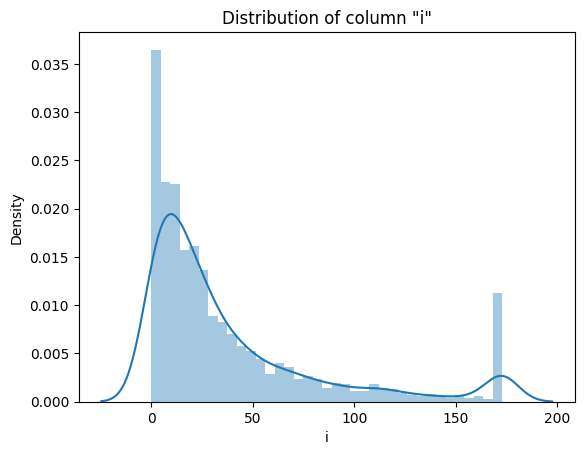

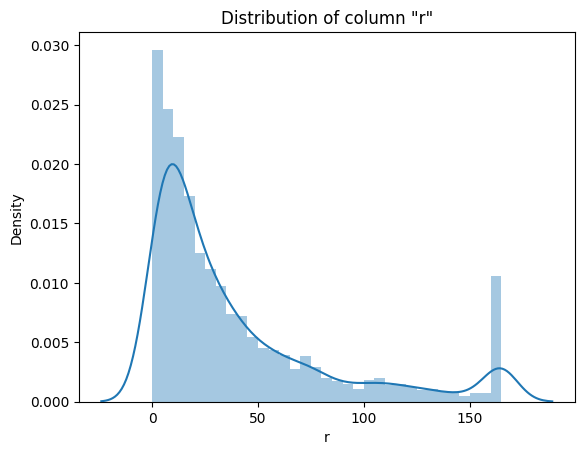

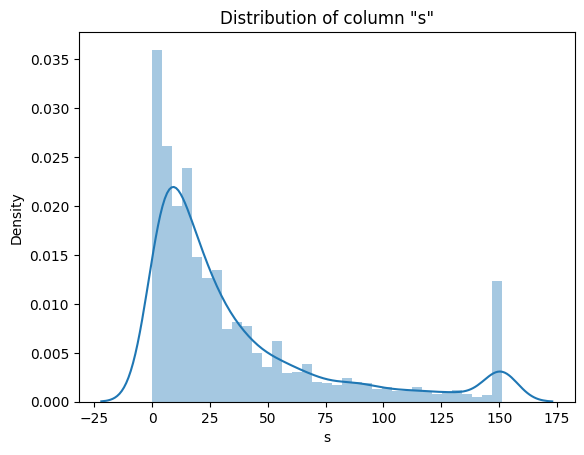

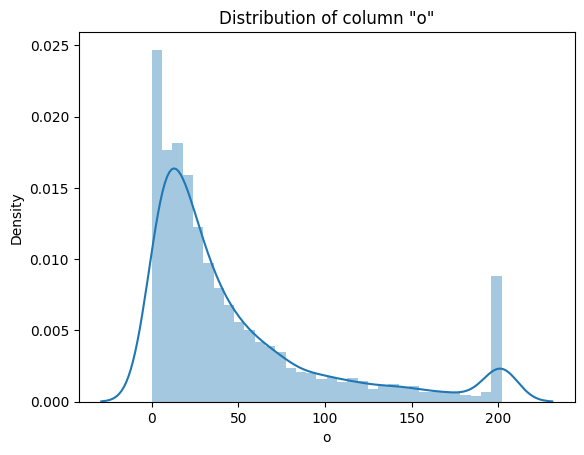

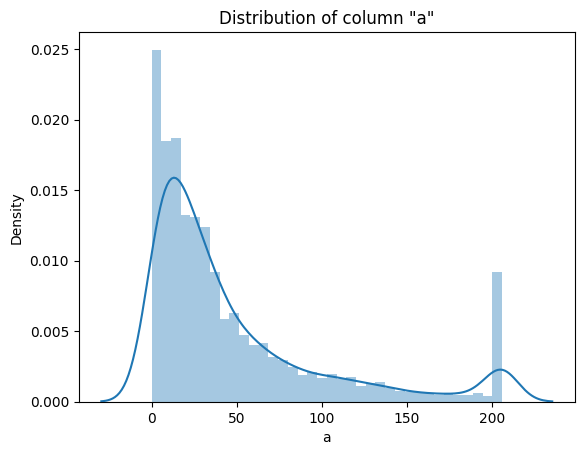

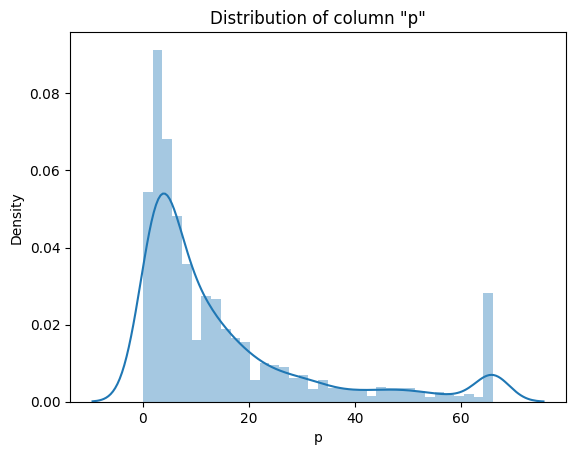

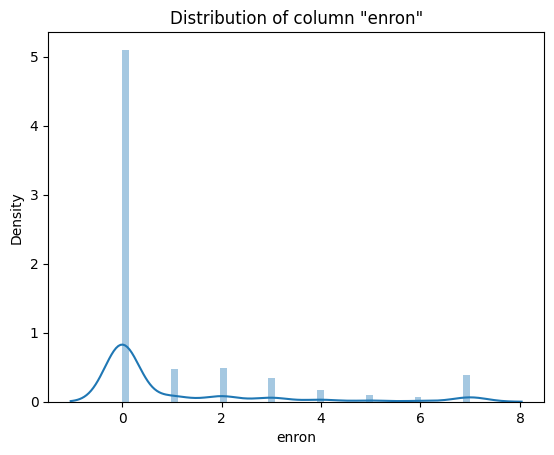

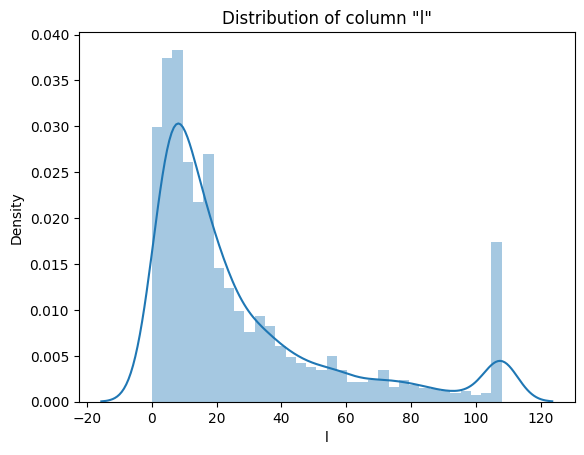

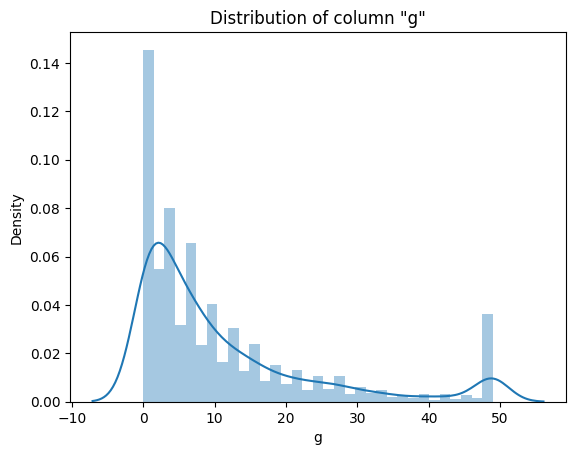

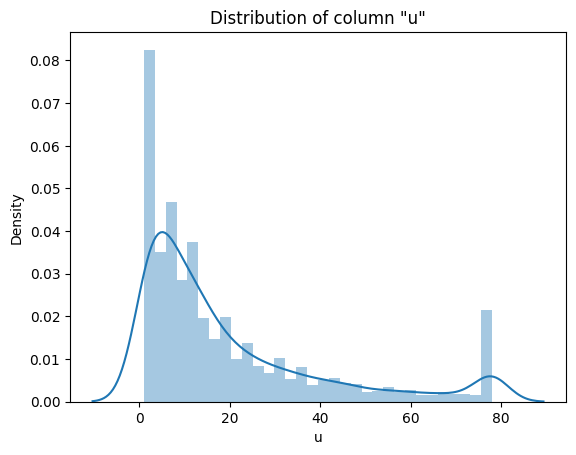

In [16]:
# lets try the top words distributions in spam and non spam emails
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
plot_cols(top_features)

#### Data distribution does not look normal, and it would need feature standardization to be effectively run the models

<Axes: >

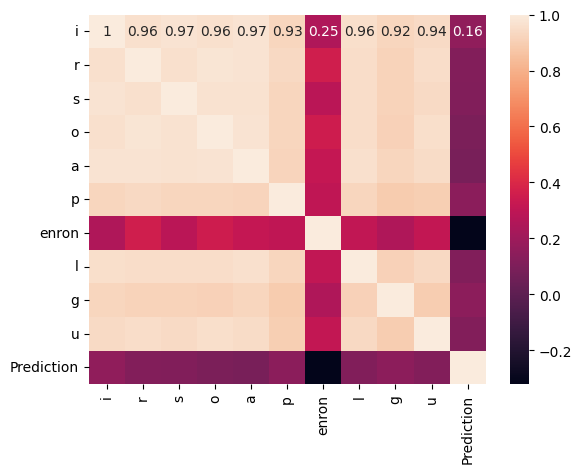

In [17]:
# heat map for top 10 spam words
import seaborn as sns
top_features.append('Prediction')
sns.heatmap(cleaned_email_df[top_features].corr(),annot=True)

In [18]:
cleaned_email_df[top_features].corr()

,i,r,s,o,a,p,enron,l,g,u,Prediction
i,1.000000,0.961787,0.970402,0.963262,0.969827,0.925677,0.248077,0.957332,0.924296,0.938725,0.157387
r,0.961787,1.000000,0.961346,0.976373,0.971973,0.933262,0.356661,0.950167,0.915371,0.948636,0.114864
s,0.970402,0.961346,1.000000,0.965561,0.967743,0.927671,0.286170,0.952077,0.915234,0.941869,0.110346
o,0.963262,0.976373,0.965561,1.000000,0.970500,0.924355,0.345936,0.952960,0.908411,0.956371,0.093567
a,0.969827,0.971973,0.967743,0.970500,1.000000,0.919425,0.316673,0.961400,0.923923,0.943439,0.086288
p,0.925677,0.933262,0.927671,0.924355,0.919425,1.000000,0.303181,0.922891,0.888921,0.898050,0.141332
enron,0.248077,0.356661,0.286170,0.345936,0.316673,0.303181,1.000000,0.306438,0.247938,0.312347,-0.321167
l,0.957332,0.950167,0.952077,0.952960,0.961400,0.922891,0.306438,1.000000,0.910369,0.936667,0.107724
g,0.924296,0.915371,0.915234,0.908411,0.923923,0.888921,0.247938,0.910369,1.000000,0.893737,0.148407
u,0.938725,0.948636,0.941869,0.956371,0.943439,0.898050,0.312347,0.936667,0.893737,1.000000,0.116782


### Feature selection 

* From heat map and the correlation matrics , the features are contributing relatively small variance. And the features are highly correlated, to remove this multicolinearity I will apply dimentionalty reduction technique like PCA will produce a new and uncorrelated features/components.
* Also there are 3000 features in the dataset. Considering this the best way is to apply dimentionality reduction and select the resulted components appropriately. 

## 3 Standardization and Dimensionality reduction
 The dataset contains 3,000 features, which makes it a prime candidate for dimensionality reduction. By reducing the number of features, we can streamline the data, allowing the model to run more efficiently, even with limited computational resources.
* First standardize the dataset
* I will try pca as first and try visualize clusters
* Next try UMAP and visualize the clusters.
* Select the best in both of them


In [19]:
from sklearn.preprocessing import StandardScaler
# Define the features and the outcome
X = cleaned_email_df.iloc[:, :3000]
y = cleaned_email_df.iloc[:, 3000]

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

 PCA explained variance for components: [0.24597752 0.03287347 0.01707137 0.0146856  0.01256107 0.01073357
 0.01043108 0.00955583 0.00807597 0.00751782 0.00693578 0.00672344
 0.00641711 0.00595152 0.00555106]


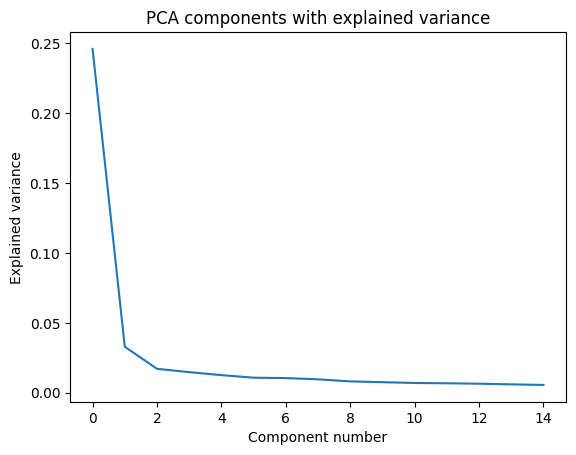

In [20]:
from sklearn.decomposition import PCA
# Try with 5 components and see the explained variance for components
pca = PCA(n_components=15)

# Get the components by 
# calling `fit_transform()` method with the data
pca_components = pca.fit_transform(X_std)
import matplotlib.pyplot as plt

print(f" PCA explained variance for components: {pca.explained_variance_ratio_}")
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Component number')
plt.ylabel('Explained variance')
plt.title('PCA components with explained variance')
plt.show()

In [21]:
# from data above 6 components looks optimal so will go a head with 2 components
pca = PCA(n_components=6)

# Get the components by 
# calling `fit_transform()` method with the data
pca_components = pca.fit_transform(X_std)
print(pca.explained_variance_ratio_)
pca_components

[0.24597752 0.03287347 0.01707137 0.0146856  0.01256103 0.0107335 ]


array([[-10.46767922,  -1.43270045,  -0.07096168,   0.03680777,
          0.23500971,  -0.54147321],
       [ 11.85035834,   5.73828629,   4.53526256,  -0.95453203,
         -3.56063551,   3.63151311],
       [ -9.71456407,  -0.73091383,   1.19812038,  -1.21075016,
          0.40450665,  -0.50043399],
       ...,
       [ -8.51452025,  -2.56911293,   1.04799042,   0.58501046,
          0.14707891,  -0.65250431],
       [ -1.45040307,  -4.81889913,  -0.6369301 ,   1.83580348,
          0.70454256,  -1.40261739],
       [ 18.75670588,   5.40412815,  -7.90630079,  -0.40948348,
         -0.2693622 ,   0.48414932]])

In [22]:
# now try umap dimensionality reduction on data
import umap
import time
time_start = time.time()

umap_results = umap.UMAP(n_components=6,
                         n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X_std)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 8.416918754577637 seconds


In [23]:
def plot_label(components,dtype):
    ''' plot components 
      plot components with color and target labels and colors '''
    plt.figure(figsize=(1, 1))
    plt.text(0.01, 0.01, f" Dimensionality reduction with {dtype}", fontsize=10)
    plt.axis('off')  # Hide the axes
    plt.show()
    plt.figure(figsize=(.75, 0.45))
    if dtype == 'UMAP':
         plt.figure(figsize=(2, 1))
    colours = ["r", "b", "g"]
    for i in range(components.shape[0]):
        plt.text(components[i, 0], components[i, 1], str(y.iloc[i]),
                 color=colours[int(y.iloc[i])],
                 fontdict={'weight': 'bold', 'size': 30}
                 )
    plt.show()


def plot(components,dtype):
    ''' plot components 
      scatter plot components '''
    plt.figure(figsize=(10, 5))
    plt.scatter(components[:, 0], components[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.title(f" Dimensionality reduction with {dtype}",y=1.05)
    plt.show()

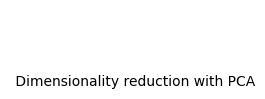

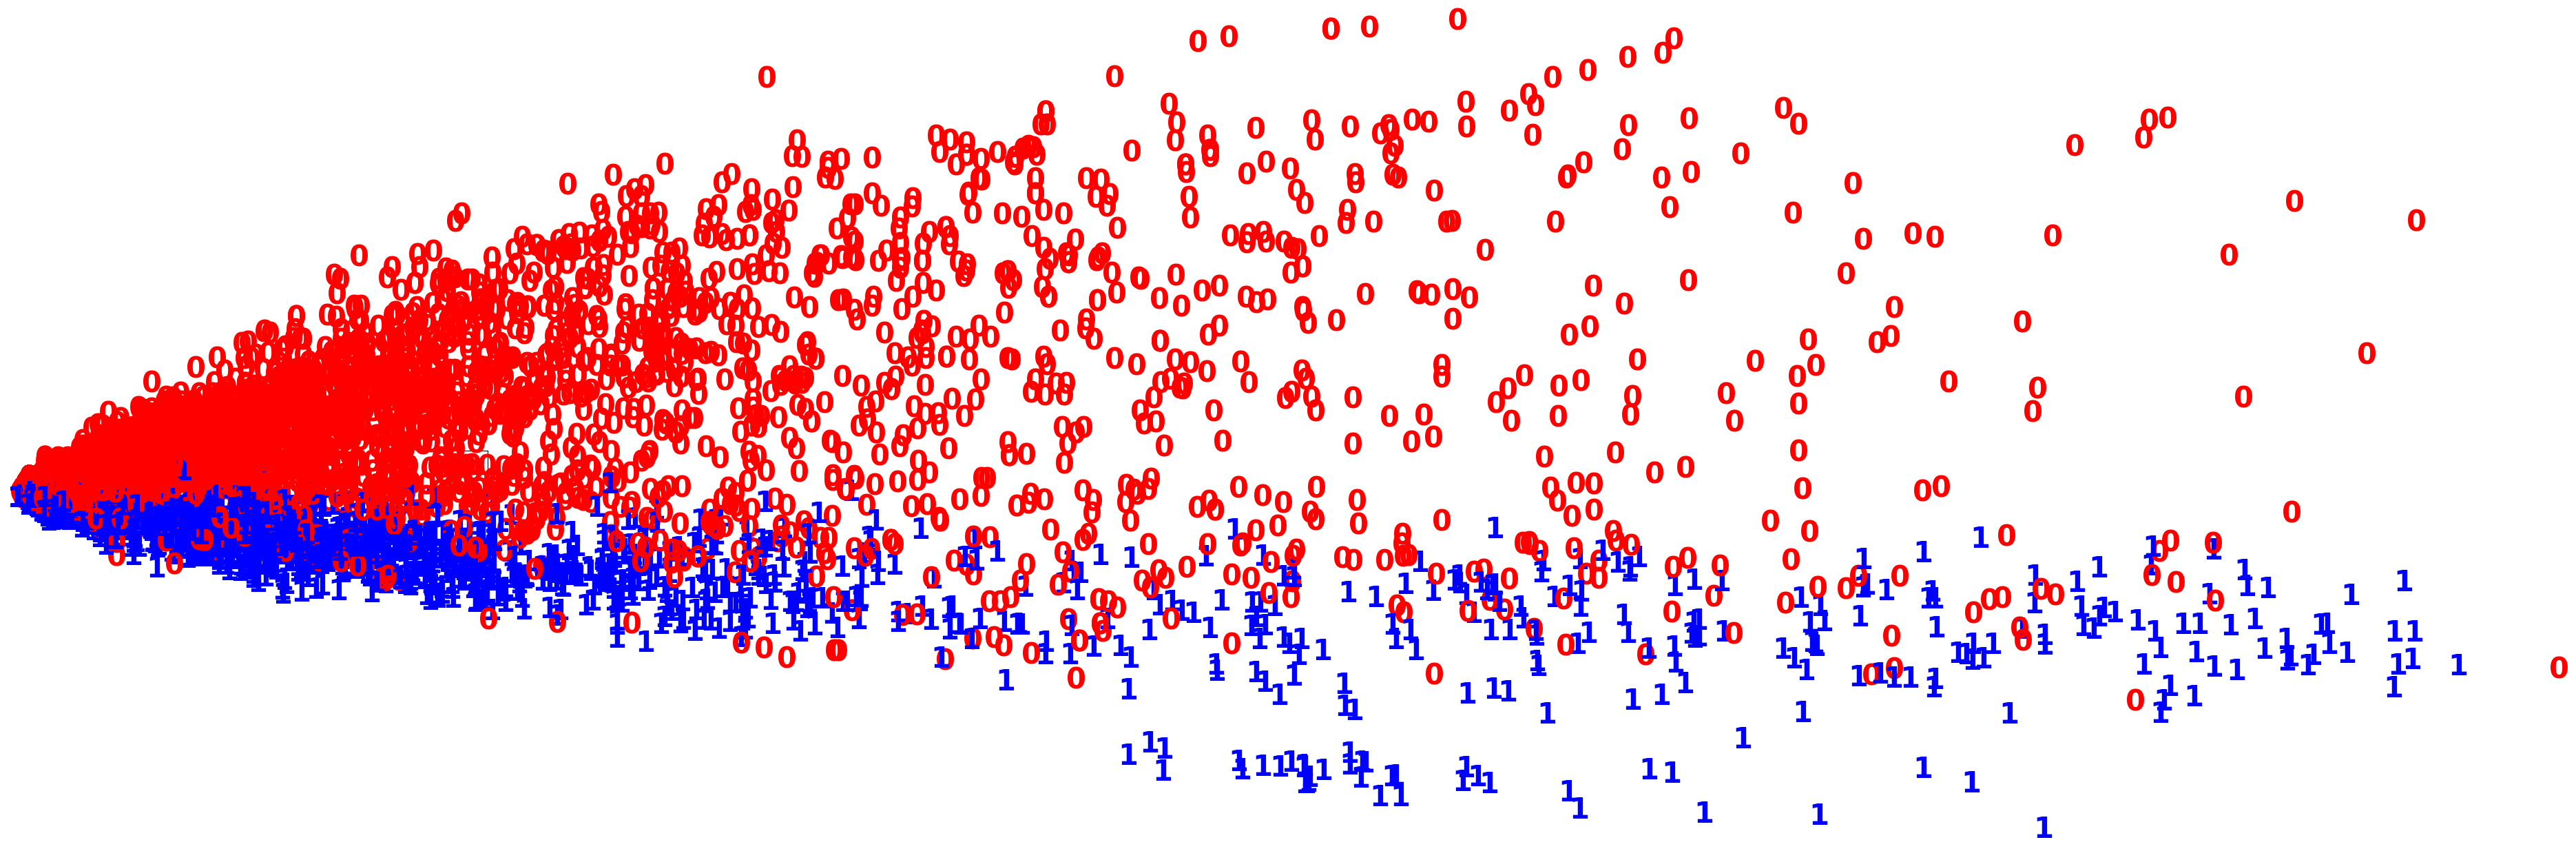

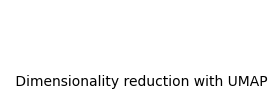

<Figure size 75x45 with 0 Axes>

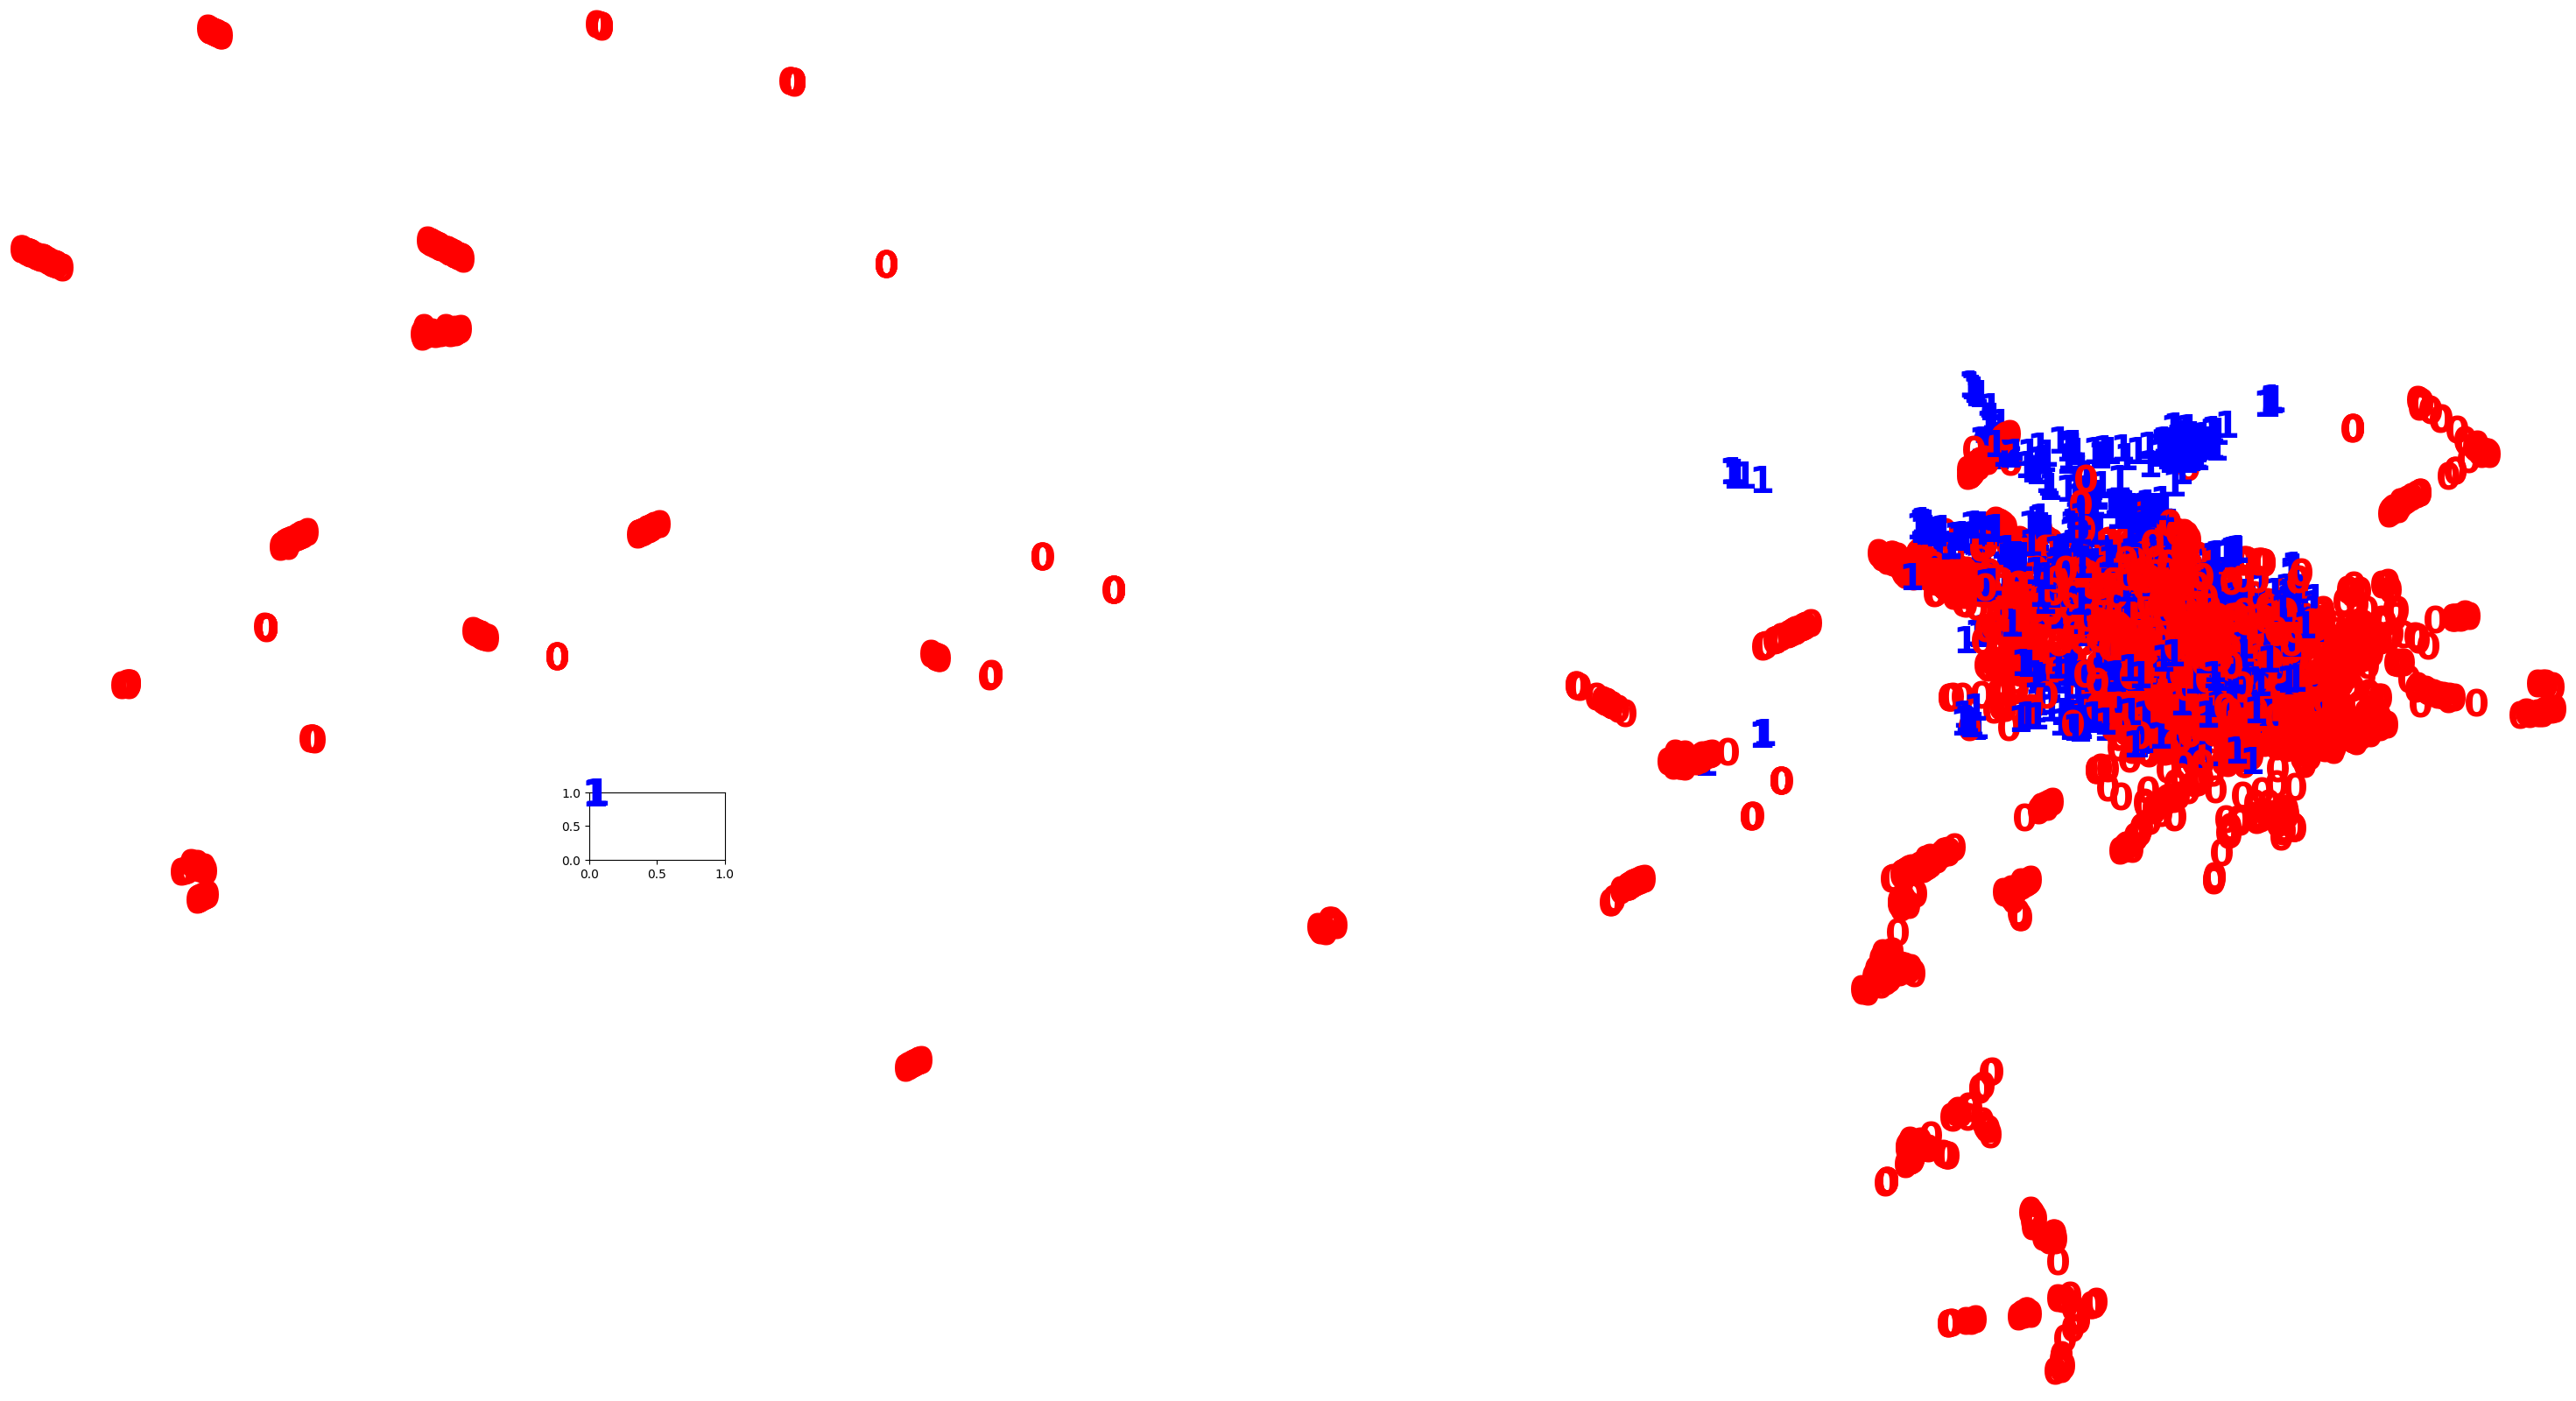

In [24]:
# scatter plot the PCA 
# time to compare PCA and T-SNE
plot_label(pca_components,"PCA")
plot_label(umap_results,"UMAP")

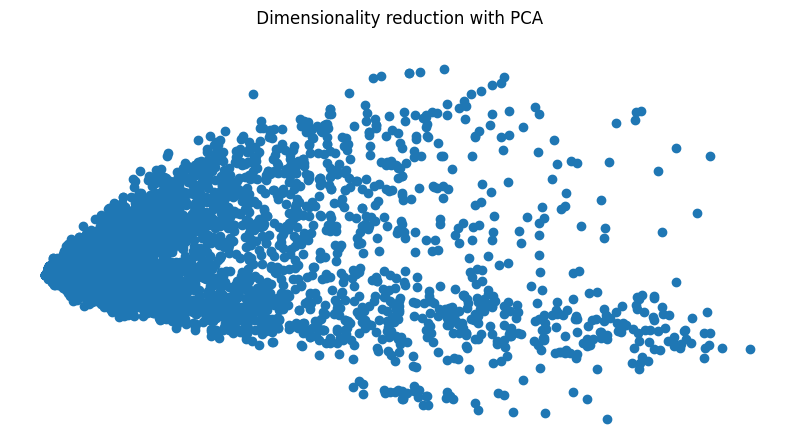

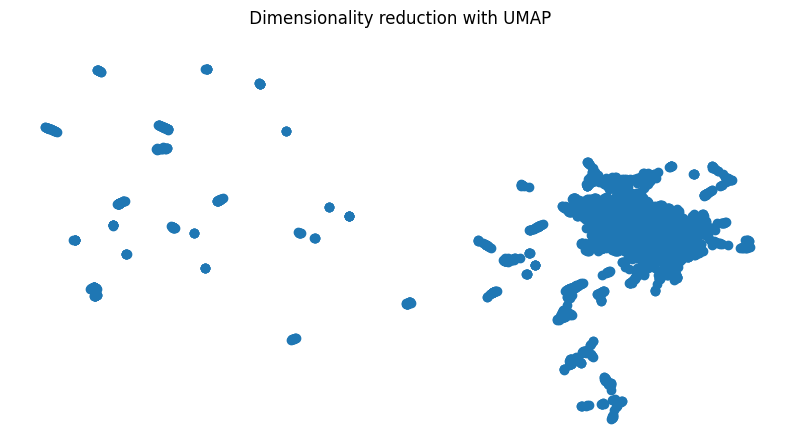

In [25]:
plot(pca_components,"PCA")
plot(umap_results,"UMAP")

##### From above dimensionality reduction it clearly the PCA is seperating spam and non spams better than the UMAP. So will be selection PCA components to cluster the data.

In [26]:
components=pca_components

## 4 . Clustering the data
* I will apply simple k means to cluster the data and see performanace
* I will apply Gaussian mixture soft clustering algorithm and measure the performance 

In [27]:
from sklearn.cluster import KMeans
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=2, random_state=250)

# Fit model
kmeans_fit = kmeans_cluster.fit(components)
y_pred = kmeans_cluster.predict(components)

In [28]:
def plot_pred(components,y_pred):
 plt.figure(figsize=(2,1))
 colours = ['r','b','g']
 for i in range(components.shape[0]):
    plt.text(components[i, 0], components[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 40}
        )

 plt.xticks([])
 plt.yticks([])
 plt.axis('off')
 plt.show()

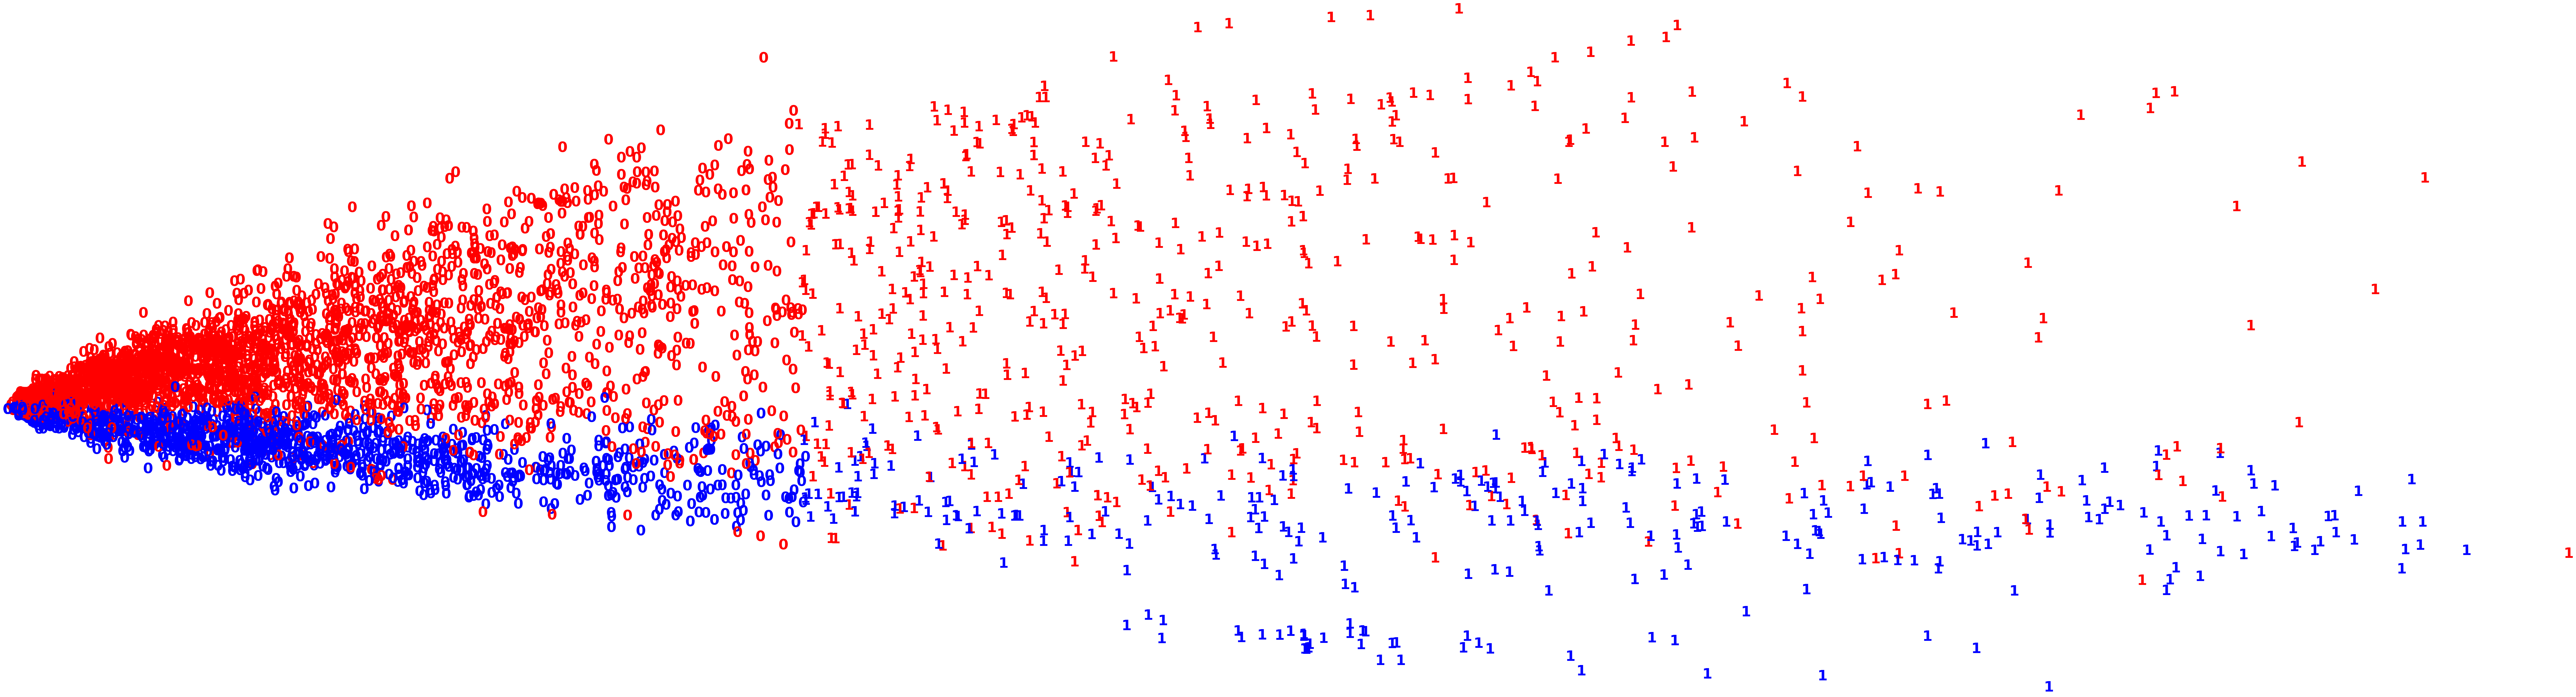

In [29]:
components.shape
plot_pred(components,y_pred)

In [30]:
pd.crosstab(y,y_pred)

col_0,0,1
Prediction,,
0,3082,590
1,1204,296


In [31]:
from sklearn import  metrics
model_stats = []
print('silhouette_score:',metrics.silhouette_score(X, y_pred, metric='euclidean'))
print('random index:' , metrics.rand_score(y,y_pred))
print('adjusted random index:' ,metrics.adjusted_rand_score(y,y_pred))
print('Davies-Bouldin Index:' ,metrics.davies_bouldin_score(X, kmeans_fit.labels_))

model_stats.append(['KMeans',metrics.silhouette_score(X, y_pred, metric='euclidean'),
                metrics.rand_score(y,y_pred),
                metrics.adjusted_rand_score(y,y_pred),metrics.davies_bouldin_score(X, kmeans_fit.labels_)]
              )

silhouette_score: 0.6970843466582339
random index: 0.5468113488529865
adjusted random index: 0.018936984197234774
Davies-Bouldin Index: 0.5425082029794045


In [32]:
from sklearn.mixture import GaussianMixture

# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123)
# Fit model
clusters = gmm_cluster.fit_predict(components)

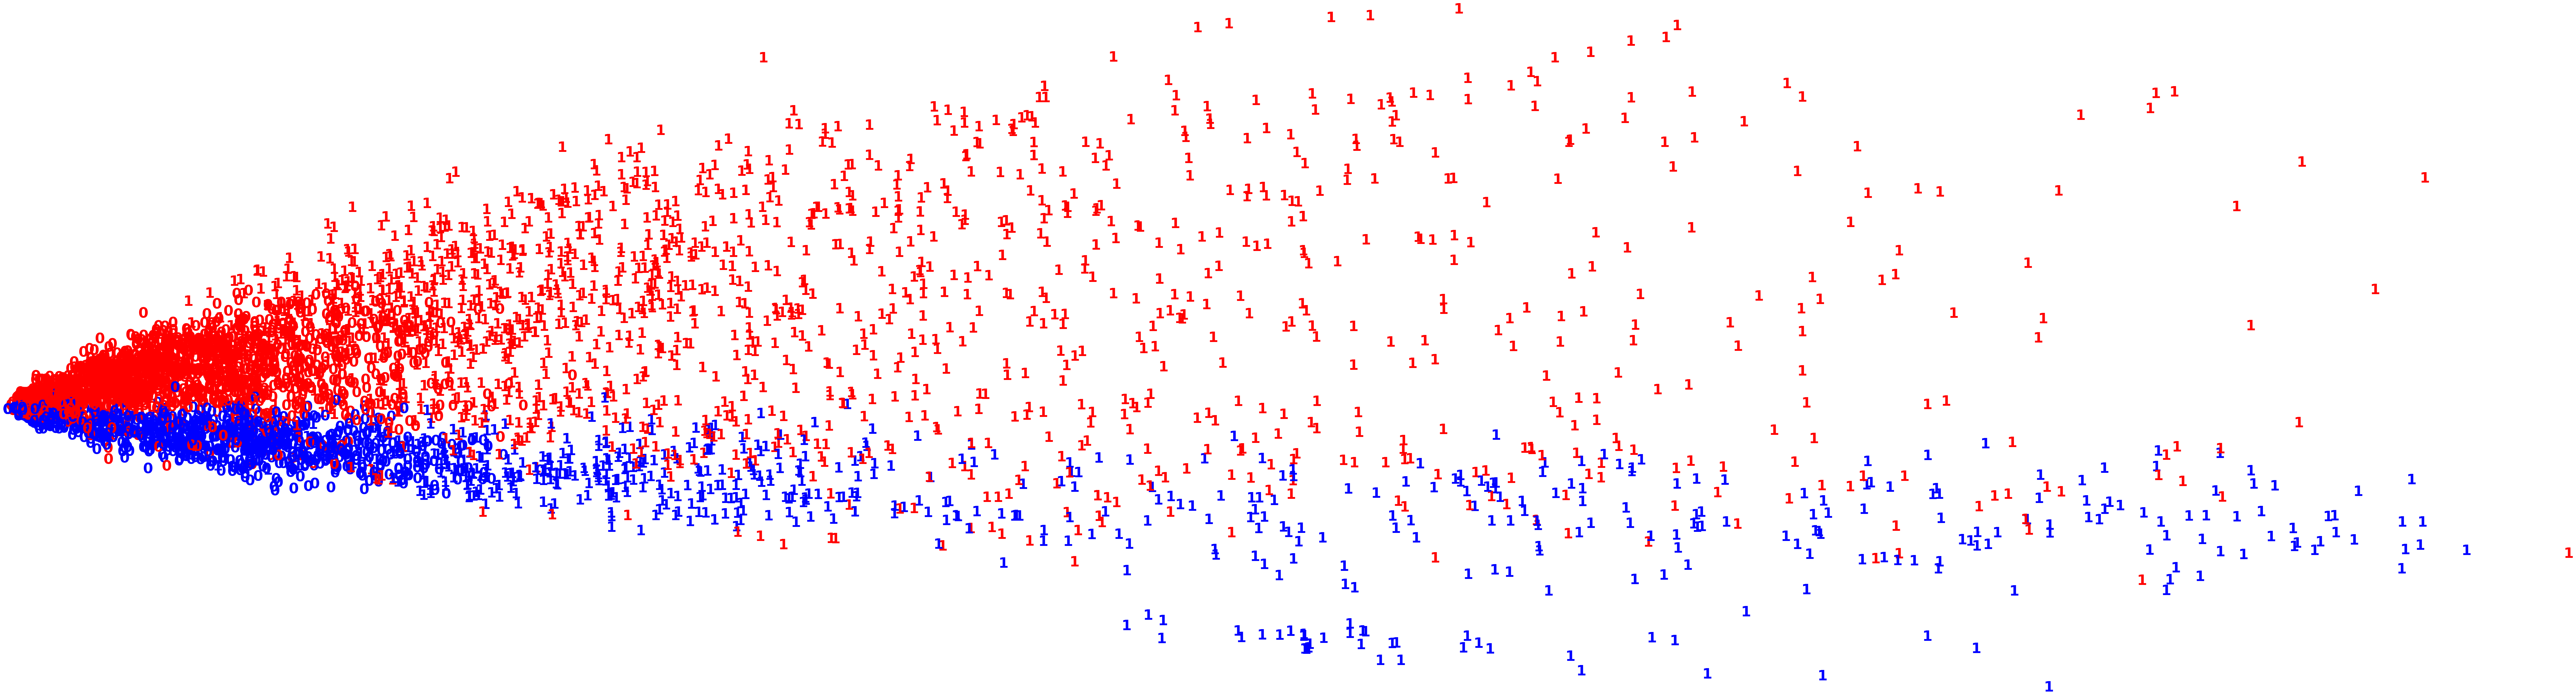

In [33]:
plot_pred(components,clusters)

In [34]:
print('silhouette_score:',metrics.silhouette_score(X, clusters, metric='euclidean'))
print('random index:' , metrics.rand_score(y,clusters))
print('adjusted random index:' ,metrics.adjusted_rand_score(y,clusters))
print('Davies-Bouldin Index:' ,metrics.davies_bouldin_score(X, clusters))
model_stats.append(['GaussianMixture', metrics.silhouette_score(X, clusters, metric='euclidean'),
                metrics.rand_score(y,clusters),
                metrics.adjusted_rand_score(y,clusters),
                    metrics.davies_bouldin_score(X, clusters)
                   ]
              )

silhouette_score: 0.4658503066410217
random index: 0.5010531545804784
adjusted random index: -0.002883645233088249
Davies-Bouldin Index: 0.8137892053958824


In [35]:
# select 2 clusters for spam detection and tune on covariance_type
for covariance_type in ['full','tied','diag','spherical']:
 # Defining the agglomerative clustering
 gmm_cluster = GaussianMixture(covariance_type=covariance_type,
                               n_components=2, random_state=123)
 # Fit model
 %timeit clusters = gmm_cluster.fit_predict(components)
 print(f'covariance_type is {covariance_type}')
 print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
 print("The silhouette score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

291 ms ± 3.13 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
covariance_type is full
Adjusted Rand Index of the GMM solution: -0.002883645233088249
The silhouette score of the GMM solution: 0.20289108624030205
292 ms ± 4.77 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
covariance_type is tied
Adjusted Rand Index of the GMM solution: -0.002883645233088249
The silhouette score of the GMM solution: 0.20289108624030205
The slowest run took 4.43 times longer than the fastest. This could mean that an intermediate result is being cached.
248 ms ± 74.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
covariance_type is diag
Adjusted Rand Index of the GMM solution: -0.002883645233088249
The silhouette score of the GMM solution: 0.20289108624030205
270 ms ± 23.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
covariance_type is spherical
Adjusted Rand Index of the GMM solution: -0.002883645233088249
The silhouette score of the GMM solution: 0.20289108624030205


   From above covariance_type tuning , there is no improvement in the model and the score remains same

### 5. Model performance


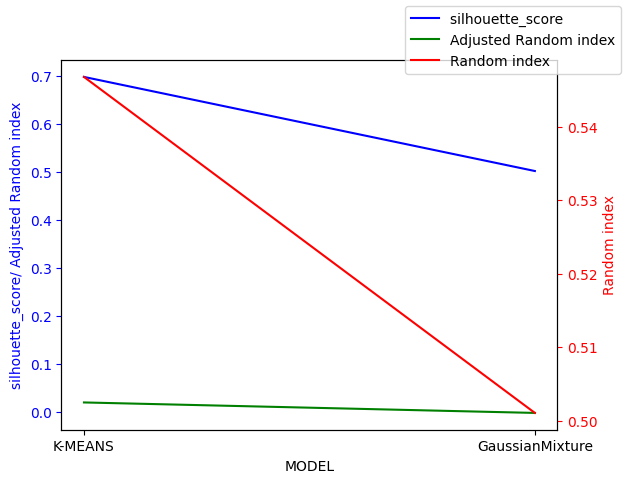

In [36]:
# Create the plot
fig, ax1 = plt.subplots()

# Plot the first y-axis
ax1.plot( ['K-MEANS','GaussianMixture'],[model_stats[0][1],model_stats[1][2]], 'b-', label='silhouette_score ')
ax1.set_xlabel('MODEL')
ax1.set_ylabel('silhouette_score/ Adjusted Random index', color='b')
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()
ax2.plot( ['K-MEANS','GaussianMixture'],[model_stats[0][2],model_stats[1][2]], 'r-', label='Random index')
ax2.set_ylabel('Random index', color='r')
ax2.tick_params('y', colors='r')
ax1.plot( ['K-MEANS','GaussianMixture'],[model_stats[0][3],model_stats[1][3]], 'g-', label='Adjusted Random index')

fig.legend()
plt.show()


     Above plot shows the performance of the KMEAN and Gaussian Mixture models. Th KMeans clearly performing better clustering compared to Gaussian Mixture.

In [37]:
# Here tabularize the model comparision metrics
moder_performance_df = pd.DataFrame(model_stats, columns = ['Clustering model','silhouette_score', 'Random index','Adjusted Random index','Davies-Bouldin Index']) 
moder_performance_df.head()

,Clustering model,silhouette_score,Random index,Adjusted Random index,Davies-Bouldin Index
0,KMeans,0.697084,0.546811,0.018937,0.542508
1,GaussianMixture,0.465850,0.501053,-0.002884,0.813789


## 6. Conclusion 
 K-means and Gaussian Mixture models run on features after applying PCA. 
*  The performance of the k-Means algorithm is promising, with a silhouette score of 0.697, a Rand Index (RI) of 0.546, an Adjusted Rand Index (ARI) of 0.018, and a Davies-Bouldin Index of 0.54. These metrics suggest that k-Means effectively clusters the data, with relatively well-separated clusters and a moderate level of internal cohesion.

* On the other hand, the Gaussian Mixture Model (GMM) shows a lower silhouette score of 0.46, a Rand Index (RI) of 0.50, an Adjusted Rand Index (ARI) of -0.002, and a Davies-Bouldin Index of 0.81. While these results are less favorable compared to k-Means, GMM still demonstrates an ability to cluster the data—though with a higher degree of overlap between clusters and less distinct separation.

* Both models exhibit the capacity to effectively distinguish between spam and non-spam emails in the dataset. However, the k-Means algorithm appears to deliver more cohesive and well-separated clusters, making it a stronger choice in this case. Meanwhile, the GMM may still hold value in scenarios where a more flexible, probabilistic approach is desired, despite its relatively weaker performance in this particular instance.




## 7. Further Exploration
* I have selected a dataset with available labels, which makes it particularly interesting to evaluate the performance of supervised learning techniques. Given the clustering results, further exploration using supervised learning approaches, such as classification algorithms, is recommended to fully assess the predictive capabilities of the model on this data. By leveraging labeled data, we can move towards a more robust understanding of how the models can generalize and predict future instances of spam versus non-spam emails.